## AirBnB Sentimental Analysis - Model Building and Selection - Step 3

> The purpose of this report is **to analyze customer reviews for Bangkok AirBnb**. And act as a stepping stone **to know what the customers think of the service offered by Asheville's Airbnb, and this analysis could help to know if the hosts are providing good customer service or not**. The analysis progress would be separated on several notebook, and will cover from *data preprocessing, text preprocessing, topic modelling, visualization, model building, to model testing*. 

> This notebook specifically will only cover the **MODEL BUILDING** and **MODEL SELECTION** part.

> The dataset contains the **detailed review data for listings in Bangkok** compiled on **21 Sep, 2022**. The data are from the **Inside Airbnb site**, it is sourced from publicly available information, from the Airbnb site. The data has been analyzed, cleansed and aggregated where appropriate to faciliate public discussion. More on this data, and other similar data refers to this [link](http://insideairbnb.com/get-the-data.html)

## IMPORT LIBRARIES

In [1]:
# data wrangling

import re
import string
import pandas as pd
import numpy as np
import spacy
from numpy import array
from numpy import asarray
from numpy import zeros
import re
import string

# data visualization
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rcParams
%matplotlib inline
plt.style.use('ggplot')
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

# text processing
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

# modelling
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import f_classif, SelectKBest
from tensorflow.keras import backend as K
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
import unidecode
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score,roc_curve,auc
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score

# filter warning
import warnings
warnings.filterwarnings("ignore")

## OVERVIEW

In [2]:
# load data

df = pd.read_csv('airbnb-bkk-reviews-tokenized.csv')

In [3]:
# show top 5

df.head()

listing_id       id        date  reviewer_id reviewer_name  \
0       27934  1094339  2012-04-07      1368195       Michael   
1      172332  3367236  2013-01-18      4406839        Sophie   
2       27934  1241042  2012-05-07      2007324         Scott   
3      172332  4227455  2013-04-20      5857160         Erick   
4      172332  7747052  2013-10-01      7431791         Peter   

                                            comments lang  \
0  We stayed in the apartment for a week and we e...   en   
1  \r<br/>We, my husband, my daughter (15 months)...   en   
2  My girlfriend and I recently stayed in Nuttee'...   en   
3  I honestly can't thank Raewyn enough. Myself a...   en   
4  This was my first time in Bangkok and I could ...   en   

                                    comments_cleaned  \
0  stayed apartment week enjoyed much nuttee nice...   
1  br husband daughter months stayed one month pe...   
2  girlfriend recently stayed nuttee condo month ...   
3  honestly thank raewyn enough fiance looking qu...   
4  first time bangkok could picked better place s...   

                                  comments_tokenized  compound_score  \
0  apartment week much nuttee nice host perfect a...          0.8720   
1  daughter month month peace host friendly know ...          0.9794   
2  girlfriend nuttee month beautiful great view g...          0.9885   
3  enough fiance quiet place hectic life property...          0.9871   
4  first time well place well people complexity c...          0.9552   

  sentiment                                 topics  
0  positive  comfortable host room clean apartment  
1  positive  comfortable host room clean apartment  
2  positive         value stay host location great  
3  positive      close perfect clean amazing place  
4  positive      close perfect clean amazing place

In [4]:

df.tail()

listing_id                  id        date  reviewer_id  \
177909  706107713188647022  707676595298286010  2022-09-03    338572947   
177910  710588929620049969  717799228870862725  2022-09-17       996481   
177911  710710056332826161  716267676026310287  2022-09-15      9555706   
177912  717796047487387803  719207337995482279  2022-09-19     26461010   
177913  707439535910302353  712750445698916344  2022-09-10      2781667   

       reviewer_name                                           comments lang  \
177909        Dieuvy  It was a nice apartment and very clean. A nice...   en   
177910        Wilson  Angelia is such a great host! Everything as de...   en   
177911          Lino  We really enjoyed our stay at Brians flat. Bri...   en   
177912        Jiajia  The owner’s attitude was so nice and I had bee...   en   
177913       Alberto  Super hotel, just a bit confusing to get there...   en   

                                         comments_cleaned  \
177909  nice apartment clean nice rooftop pool short s...   
177910  angelia great host everything description plac...   
177911  really enjoyed stay brians flat brian helpful ...   
177912  owner attitude nice served well certainly come...   
177913  super hotel bit confusing get overall great st...   

                                       comments_tokenized  compound_score  \
177909       nice apartment clean rooftop pool short nice          0.8074   
177910   great host description place clean thank listing          0.8519   
177911  brian flat brian helpful tip orientation stuff...          0.4215   
177912       owner attitude nice next time good condition          0.6908   
177913  super hotel bit confusing overall great structure          0.7964   

       sentiment                                 topics  
177909  positive          location pool clean room nice  
177910  positive         value stay host location great  
177911  positive  comfortable host room clean apartment  
177912  positive         room price value location good  
177913  positive         value stay host location great

In [5]:
# check info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177914 entries, 0 to 177913
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   listing_id          177914 non-null  int64  
 1   id                  177914 non-null  int64  
 2   date                177914 non-null  object 
 3   reviewer_id         177914 non-null  int64  
 4   reviewer_name       177914 non-null  object 
 5   comments            177914 non-null  object 
 6   lang                177914 non-null  object 
 7   comments_cleaned    177914 non-null  object 
 8   comments_tokenized  176819 non-null  object 
 9   compound_score      177914 non-null  float64
 10  sentiment           177914 non-null  object 
 11  topics              177914 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 16.3+ MB


In [6]:
# function to check data summary

def summary(df):
    
    columns = df.columns.to_list()
    
    dtypes = []
    unique_counts = []
    missing_counts = []
    missing_percentages = []
    total_counts = [df.shape[0]] * len(columns)

    for col in columns:
        dtype = str(df[col].dtype)
        dtypes.append(dtype)
        unique_count = df[col].nunique()
        unique_counts.append(unique_count)
        missing_count = df[col].isnull().sum()
        missing_counts.append(missing_count)
        missing_percentage = round((missing_count/df.shape[0]) * 100, 2)
        missing_percentages.append(missing_percentage)

    df_summary = pd.DataFrame({
        "column": columns,
        "dtypes": dtypes,
        "unique_count": unique_counts,
        "missing_values": missing_counts,
        "missing_percentage": missing_percentages,
        "total_count": total_counts,
    })

    return df_summary.sort_values(by="missing_percentage", ascending=False).reset_index(drop=True)

In [7]:
# check summary

summary(df)

column   dtypes  unique_count  missing_values  \
0   comments_tokenized   object        163133            1095   
1           listing_id    int64          9367               0   
2                   id    int64        177914               0   
3                 date   object          3676               0   
4          reviewer_id    int64        149093               0   
5        reviewer_name   object         47405               0   
6             comments   object        172964               0   
7                 lang   object             1               0   
8     comments_cleaned   object        169171               0   
9       compound_score  float64          1930               0   
10           sentiment   object             3               0   
11              topics   object             5               0   

    missing_percentage  total_count  
0                 0.62       177914  
1                 0.00       177914  
2                 0.00       177914  
3                 0.00       177914  
4                 0.00       177914  
5                 0.00       177914  
6                 0.00       177914  
7                 0.00       177914  
8                 0.00       177914  
9                 0.00       177914  
10                0.00       177914  
11                0.00       177914

> Although these have been fixed on the previous process, seems that there are some `dtypes` that are not proper, there are also a missing values on *comments_tokenized* feature, and check the previous matter regarding the *no description comments*. Therefore once again I'll clean the data on preprocessing first before going on text cleaning.

## PREPROCESSING

In [8]:
# check the missing values

df[df['comments_tokenized'].isna()]

listing_id                  id        date  reviewer_id  \
594                 385979            62543795  2016-02-15     42246617   
951                 393066            14209523  2014-06-14     10774325   
1106                145343  697421003951725743  2022-08-20    212953652   
2586                580270           147515255  2017-04-27     56810031   
2646                988373            18475984  2014-08-27       172512   
...                    ...                 ...         ...          ...   
177252  650421346135669132  679323698735989600  2022-07-26    331325939   
177370  662577913253773910  717020539272408791  2022-09-16    318577107   
177438  664938661274186231  677885798457142749  2022-07-24     70287028   
177535  667151914697564581  698162826478978914  2022-08-21     40618806   
177728  685204872474144790  691724280877419084  2022-08-12        19069   

                  reviewer_name  \
594                           纳   
951                    Masayuki   
1106                      Caleb   
2586                      Julia   
2646    Jean-Gratien & Nalliely   
...                         ...   
177252                       승혁   
177370               Ko Hwiyong   
177438                       An   
177535                      Jon   
177728                      Tao   

                                                 comments lang  \
594                                              It's ok    en   
951                                                 thanx   en   
1106                               Would never stay again   en   
2586                              I had an awesome stay!    en   
2646               We loved it and highly recommended it.   en   
...                                                   ...  ...   
177252                                         Not clean.   en   
177370                  thank you.<br/>clean and peaceful   en   
177438  5 minites to subway station, the condo is clea...   en   
177535                                          thank you   en   
177728                                 Highly recommended   en   

                                    comments_cleaned comments_tokenized  \
594                                               ok                NaN   
951                                            thanx                NaN   
1106                                would never stay                NaN   
2586                                    awesome stay                NaN   
2646                        loved highly recommended                NaN   
...                                              ...                ...   
177252                                         clean                NaN   
177370                       thank br clean peaceful                NaN   
177438  minites subway station condo clean valueable                NaN   
177535                                         thank                NaN   
177728                            highly recommended                NaN   

        compound_score sentiment                                 topics  
594                0.0   neutral  comfortable host room clean apartment  
951                0.0   neutral  comfortable host room clean apartment  
1106               0.0   neutral  comfortable host room clean apartment  
2586               0.0   neutral  comfortable host room clean apartment  
2646               0.0   neutral  comfortable host room clean apartment  
...                ...       ...                                    ...  
177252             0.0   neutral  comfortable host room clean apartment  
177370             0.0   neutral  comfortable host room clean apartment  
177438             0.0   neutral  comfortable host room clean apartment  
177535             0.0   neutral  comfortable host room clean apartment  
177728             0.0   neutral  comfortable host room clean apartment  

[1095 rows x 12 columns]

> Seeing above missing values, I think the review itself still considered proper. But for modelling purpose, I'll drop these instead so that these data will not disturb the model.

In [9]:
# see the anomaly

anomaly = df[(df['comments']=='No Description') | (df['comments_cleaned']=='No Description')]

In [10]:
# show anomaly

anomaly.head()

listing_id                  id        date  reviewer_id reviewer_name  \
18667     3963238           107557973  2016-10-11     89172667        Aubrey   
25649     5744888           593809298  2020-01-17    153408062            동우   
40957     8957682           274330541  2018-06-09     88053449        Joseph   
41485     8637376  689545407425155927  2022-08-09     42662144          Jack   
49317     9917169           280311793  2018-06-23     96809532          Luna   

                     comments lang comments_cleaned comments_tokenized  \
18667          No Description   en      description        description   
25649               Up to you   en   No Description        description   
40957  You'll be on your own.   en   No Description        description   
41485          No Description   en      description        description   
49317          No Description   en      description        description   

       compound_score sentiment                                 topics  
18667             0.0   neutral  comfortable host room clean apartment  
25649             0.0   neutral  comfortable host room clean apartment  
40957             0.0   neutral  comfortable host room clean apartment  
41485             0.0   neutral  comfortable host room clean apartment  
49317             0.0   neutral  comfortable host room clean apartment

In [11]:
# see percentages

print(f'Length of anomaly : {round(len(anomaly)/len(df)*100, 2)}%')

Length of anomaly : 0.02%


In [12]:
anomaly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 18667 to 175637
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   listing_id          31 non-null     int64  
 1   id                  31 non-null     int64  
 2   date                31 non-null     object 
 3   reviewer_id         31 non-null     int64  
 4   reviewer_name       31 non-null     object 
 5   comments            31 non-null     object 
 6   lang                31 non-null     object 
 7   comments_cleaned    31 non-null     object 
 8   comments_tokenized  31 non-null     object 
 9   compound_score      31 non-null     float64
 10  sentiment           31 non-null     object 
 11  topics              31 non-null     object 
dtypes: float64(1), int64(3), object(8)
memory usage: 3.1+ KB


> The anomaly are just about 2% of the total data. Its safe to remove these values

In [13]:
# dropping the anomaly

df = df[~((df['comments'].isin(anomaly['comments'])) | (df['comments_tokenized'].isin(anomaly['comments_tokenized'])))]

In [14]:
# drop missing values

df = df.dropna()

In [15]:
# fixing columns dtpes

for i in df.columns:
    if i == 'listing_id' or i == 'id' or i == 'reviewer_id':
        df[i] = df[i].astype(np.object)
    elif i == 'date' :
        df[i] = pd.to_datetime(df[i])
    else : 
        pass

In [16]:
# check summary

summary(df)

column          dtypes  unique_count  missing_values  \
0           listing_id          object          9343               0   
1                   id          object        176782               0   
2                 date  datetime64[ns]          3676               0   
3          reviewer_id          object        148219               0   
4        reviewer_name          object         47146               0   
5             comments          object        172071               0   
6                 lang          object             1               0   
7     comments_cleaned          object        168557               0   
8   comments_tokenized          object        163132               0   
9       compound_score         float64          1930               0   
10           sentiment          object             3               0   
11              topics          object             5               0   

    missing_percentage  total_count  
0                  0.0       176782  
1                  0.0       176782  
2                  0.0       176782  
3                  0.0       176782  
4                  0.0       176782  
5                  0.0       176782  
6                  0.0       176782  
7                  0.0       176782  
8                  0.0       176782  
9                  0.0       176782  
10                 0.0       176782  
11                 0.0       176782

## Target Count
How many targets do we have? Learning this information will give us an idea about the model we will build. It will also provide guidance on our methods of analyzing data

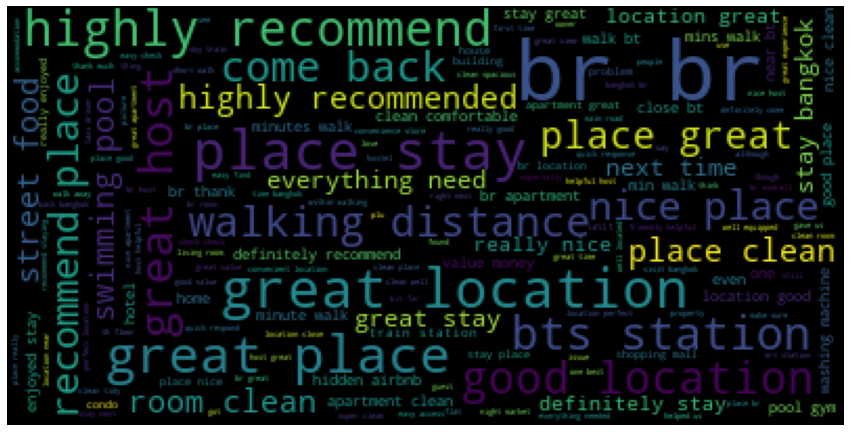

In [17]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        max_words=200,
        max_font_size=40, 
        scale=1,
        random_state=1
).generate(" ".join(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df["comments_cleaned"].values)    

In [18]:
# Assigning label
# label encode
def label_encode(x):
    if x == "negative":
        return 0
    if x == "neutral":
        return 1
    if x == "positive":
        return 2

def label_name(x):
    if x == 0:
        return "negative"
    if x == 1:
        return "neutral"
    if x == 2:
        return "positive"    
    

#Assign Label to the sentiment    
df["label"] = df["sentiment"].apply(lambda x: label_encode(x))  
df["label_name"] = df["label"].apply(lambda x: label_name(x))  

In [19]:
df.head()

listing_id       id       date reviewer_id reviewer_name  \
0      27934  1094339 2012-04-07     1368195       Michael   
1     172332  3367236 2013-01-18     4406839        Sophie   
2      27934  1241042 2012-05-07     2007324         Scott   
3     172332  4227455 2013-04-20     5857160         Erick   
4     172332  7747052 2013-10-01     7431791         Peter   

                                            comments lang  \
0  We stayed in the apartment for a week and we e...   en   
1  \r<br/>We, my husband, my daughter (15 months)...   en   
2  My girlfriend and I recently stayed in Nuttee'...   en   
3  I honestly can't thank Raewyn enough. Myself a...   en   
4  This was my first time in Bangkok and I could ...   en   

                                    comments_cleaned  \
0  stayed apartment week enjoyed much nuttee nice...   
1  br husband daughter months stayed one month pe...   
2  girlfriend recently stayed nuttee condo month ...   
3  honestly thank raewyn enough fiance looking qu...   
4  first time bangkok could picked better place s...   

                                  comments_tokenized  compound_score  \
0  apartment week much nuttee nice host perfect a...          0.8720   
1  daughter month month peace host friendly know ...          0.9794   
2  girlfriend nuttee month beautiful great view g...          0.9885   
3  enough fiance quiet place hectic life property...          0.9871   
4  first time well place well people complexity c...          0.9552   

  sentiment                                 topics  label label_name  
0  positive  comfortable host room clean apartment      2   positive  
1  positive  comfortable host room clean apartment      2   positive  
2  positive         value stay host location great      2   positive  
3  positive      close perfect clean amazing place      2   positive  
4  positive      close perfect clean amazing place      2   positive

In [20]:
df.loc[df['label'] == 0]

listing_id                  id       date reviewer_id  \
219                 320014            30570969 2015-04-24    30682108   
563                  55686           243194747 2018-03-15   137268957   
581                  59221             2000987 2012-08-16     2575132   
638                 390611            31069487 2015-05-01    22930312   
644                 390611            35607018 2015-06-20     5081717   
...                    ...                 ...        ...         ...   
177743  683749537693131693  698217145550923257 2022-08-21   361350892   
177758  688883000627553672  700434073542212932 2022-08-24   467346282   
177781  689532463119840317  694619351211041242 2022-08-16   231821023   
177850  695814779918563989  715580808292057248 2022-09-14    42609762   
177890  708361425367681434  712730479848383373 2022-09-10    40237935   

       reviewer_name                                           comments lang  \
219               Yi  Nice place,clean and easy to find.<br/>Around,...   en   
563          Lovelys  Noise from highway traffic and old air conditi...   en   
581          Dominic  Very bad experience here. I stayed for one mon...   en   
638            Linda  Nice apartment, close to everything, everythin...   en   
644           Zarina  Though Hollis was not there he did everything ...   en   
...              ...                                                ...  ...   
177743         Ahmed  mediocre check-in.<br/>no communication at all...   en   
177758          Minn  Main door cant shut close. Have to force slam ...   en   
177781         Navid  It's an isolated area. People who wants lonely...   en   
177850         Miori  There are a lot of problems with the lobby doo...   en   
177890          Cran  Cyril, the staff was awesome. She taught us th...   en   

                                         comments_cleaned  \
219     nice place clean easy find br around many rest...   
563     noise highway traffic old air conditioner into...   
581     bad experience stayed one month pay everything...   
638     nice apartment close everything everything goo...   
644     though hollis everything make sure arrival smo...   
...                                                   ...   
177743  mediocre check br communication beside service...   
177758  main door cant shut close force slam door resu...   
177781  isolated area people wants lonely suitable res...   
177850  lot problems lobby door ants rest well leave b...   
177890  cyril staff awesome taught us short cuts go go...   

                                       comments_tokenized  compound_score  \
219     nice place clean easy many restaurant bad morn...         -0.2732   
563     noise highway traffic old air conditioner into...         -0.7579   
581     bad experience month pay internet airbnb punis...         -0.8979   
638     nice apartment good kill small cockroach day b...         -0.0516   
644     sure arrival smooth problem place mind surroun...         -0.1027   
...                                                   ...             ...   
177743  mediocre check communication service hotline p...         -0.8658   
177758  main door close force slam door loud bang clos...         -0.7269   
177781  isolated area people lonely suitable night nig...         -0.3612   
177850                               lot problem door ant         -0.4019   
177890          cyril staff short cut tourist destination         -0.2732   

       sentiment                                 topics  label label_name  
219     negative  comfortable host room clean apartment      0   negative  
563     negative  comfortable host room clean apartment      0   negative  
581     negative      close perfect clean amazing place      0   negative  
638     negative         room price value location good      0   negative  
644     negative      close perfect clean amazing place      0   negative  
...          ...                                    ...    ...  

In [21]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "bar"}]])
colors = ['green', 'mediumturquoise', 'lightgreen'] # darkorange
fig.add_trace(go.Pie(labels=df.label_name.value_counts().index,
                             values=df.label.value_counts().values), 1, 1)

fig.update_traces(hoverinfo='label+percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.add_trace(go.Bar(x=df.label_name.value_counts().index, y=df.label.value_counts().values, marker_color = colors), 1,2)

fig.show()

In [22]:
df.head()

listing_id       id       date reviewer_id reviewer_name  \
0      27934  1094339 2012-04-07     1368195       Michael   
1     172332  3367236 2013-01-18     4406839        Sophie   
2      27934  1241042 2012-05-07     2007324         Scott   
3     172332  4227455 2013-04-20     5857160         Erick   
4     172332  7747052 2013-10-01     7431791         Peter   

                                            comments lang  \
0  We stayed in the apartment for a week and we e...   en   
1  \r<br/>We, my husband, my daughter (15 months)...   en   
2  My girlfriend and I recently stayed in Nuttee'...   en   
3  I honestly can't thank Raewyn enough. Myself a...   en   
4  This was my first time in Bangkok and I could ...   en   

                                    comments_cleaned  \
0  stayed apartment week enjoyed much nuttee nice...   
1  br husband daughter months stayed one month pe...   
2  girlfriend recently stayed nuttee condo month ...   
3  honestly thank raewyn enough fiance looking qu...   
4  first time bangkok could picked better place s...   

                                  comments_tokenized  compound_score  \
0  apartment week much nuttee nice host perfect a...          0.8720   
1  daughter month month peace host friendly know ...          0.9794   
2  girlfriend nuttee month beautiful great view g...          0.9885   
3  enough fiance quiet place hectic life property...          0.9871   
4  first time well place well people complexity c...          0.9552   

  sentiment                                 topics  label label_name  
0  positive  comfortable host room clean apartment      2   positive  
1  positive  comfortable host room clean apartment      2   positive  
2  positive         value stay host location great      2   positive  
3  positive      close perfect clean amazing place      2   positive  
4  positive      close perfect clean amazing place      2   positive

In [23]:
# show the imbalanced target

df['sentiment'].value_counts()

positive    165867
neutral       8085
negative      2830
Name: sentiment, dtype: int64

## Plot

For a good understanding of the Airbnb reviews we are going to plot the text in three different ways.

- First we will plot the distribution of the sentiments using pie graph express plot from plotly.
- The second plot is the famous Word Cloud graph from the wordcloud library.
- The last plot is a bar plot for the n-gram, which is a sequence of n words most common shown together. We will plot the 1 grams, 2 grams, 3 grams and 4 grams for each sentiment.

In [24]:
#Function to extract the comment sentiment
def sentiment(df):
    df['sentiment_type']='-'
    df.loc[df['label']==2,'sentiment_type']='positive'
    df.loc[df['label']==1,'sentiment_type']='neutral'
    df.loc[df['label']==0,'sentiment_type']='negative'
    df = pd.get_dummies(df,columns=['sentiment_type'])
    return df

In [25]:
df = sentiment(df)

In [26]:
df.head()

listing_id       id       date reviewer_id reviewer_name  \
0      27934  1094339 2012-04-07     1368195       Michael   
1     172332  3367236 2013-01-18     4406839        Sophie   
2      27934  1241042 2012-05-07     2007324         Scott   
3     172332  4227455 2013-04-20     5857160         Erick   
4     172332  7747052 2013-10-01     7431791         Peter   

                                            comments lang  \
0  We stayed in the apartment for a week and we e...   en   
1  \r<br/>We, my husband, my daughter (15 months)...   en   
2  My girlfriend and I recently stayed in Nuttee'...   en   
3  I honestly can't thank Raewyn enough. Myself a...   en   
4  This was my first time in Bangkok and I could ...   en   

                                    comments_cleaned  \
0  stayed apartment week enjoyed much nuttee nice...   
1  br husband daughter months stayed one month pe...   
2  girlfriend recently stayed nuttee condo month ...   
3  honestly thank raewyn enough fiance looking qu...   
4  first time bangkok could picked better place s...   

                                  comments_tokenized  compound_score  \
0  apartment week much nuttee nice host perfect a...          0.8720   
1  daughter month month peace host friendly know ...          0.9794   
2  girlfriend nuttee month beautiful great view g...          0.9885   
3  enough fiance quiet place hectic life property...          0.9871   
4  first time well place well people complexity c...          0.9552   

  sentiment                                 topics  label label_name  \
0  positive  comfortable host room clean apartment      2   positive   
1  positive  comfortable host room clean apartment      2   positive   
2  positive         value stay host location great      2   positive   
3  positive      close perfect clean amazing place      2   positive   
4  positive      close perfect clean amazing place      2   positive   

   sentiment_type_negative  sentiment_type_neutral  sentiment_type_positive  
0                        0                       0                        1  
1                        0                       0                        1  
2                        0                       0                        1  
3                        0                       0                        1  
4                        0                       0                        1

### Sentiment Distribution
To plot the distribution of the sentiments in our df we will use the main df to plot the total of each sentiment in a pie graph using the library plotly.express.

In [27]:
total = pd.DataFrame(df[df.columns[14:]].sum()).rename(columns={0:'Total'})
fig = px.pie(total,values='Total',names=total.index)
fig.show()

### Words Cloud
Now we are going to do the famous Word Cloud graph, an image composed of words used in the Airbnb reviews, in which the size of each word indicates its frequency.

To do that we are going to create 3 df. Positive, Neutral and Negative with the words that compose the reviews of each sentiment and we are going to count how many times it repeat using values_count()

In [28]:
pos_comments = list(df[df['sentiment_type_positive']==1]['comments_cleaned'].values)
positive_words = ' '.join(pos_comments).split(' ')
positive_words = pd.DataFrame(positive_words,columns=['words'])['words'].value_counts()[1:]

neu_comments = list(df[df['sentiment_type_neutral']==1]['comments_cleaned'].values)
neutral_words = ' '.join(neu_comments).split(' ')
neutral_words = pd.DataFrame(neutral_words,columns=['words'])['words'].value_counts()[1:]

neg_comments = list(df[df['sentiment_type_negative']==1]['comments_cleaned'].values)
negative_words = ' '.join(neg_comments).split(' ')
negative_words = pd.DataFrame(negative_words,columns=['words'])['words'].value_counts()[1:]

In [29]:
positive_wc = WordCloud(width=1280, height=720, collocations=False, random_state=42,
                      colormap='Blues', background_color='white', max_words=50)
positive_wc = positive_wc.generate_from_frequencies(positive_words)


neutral_wc = WordCloud(width=1280, height=720, collocations=False, random_state=42,
                          colormap='Greys', background_color='white', max_words=50)
neutral_wc = neutral_wc.generate_from_frequencies(neutral_words)


negative_wc = WordCloud(width=1280, height=720, collocations=False, random_state=42,
                          colormap='Reds_r', background_color='white', max_words=50)
negative_wc = negative_wc.generate_from_frequencies(negative_words)

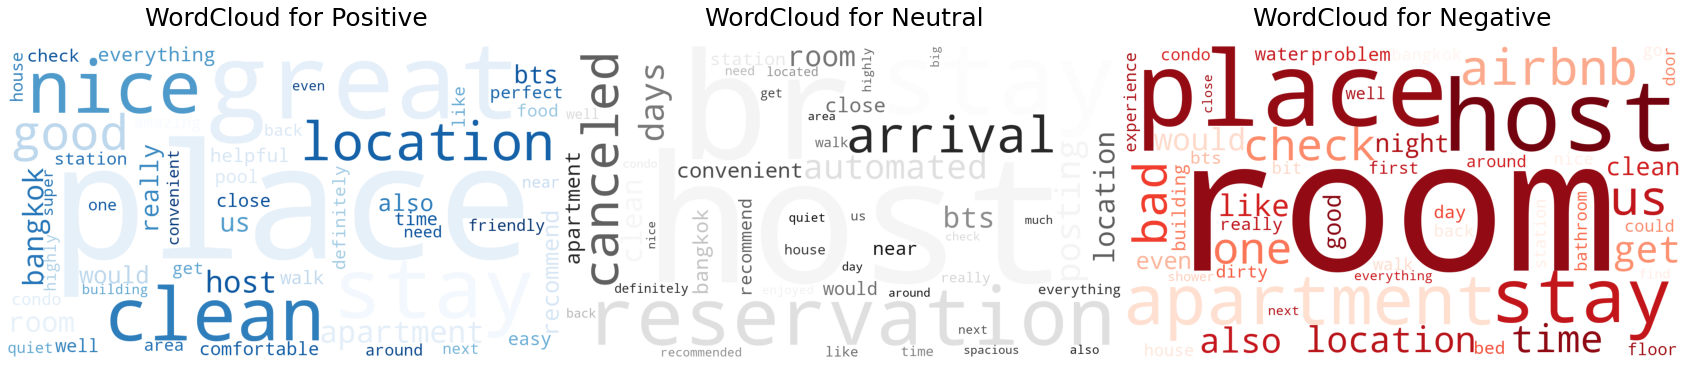

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(30, 30))

axs[0].set_title('WordCloud for Positive', size=25, pad=20)
axs[0].imshow(positive_wc)
axs[0].axis('off')

axs[1].set_title('WordCloud for Neutral', size=25, pad=20)
axs[1].imshow(neutral_wc)
axs[1].axis('off')

axs[2].set_title('WordCloud for Negative', size=25, pad=20)
axs[2].imshow(negative_wc)
axs[2].axis('off');

fig.subplots_adjust(hspace=1,wspace=0.0)

We can see the words like 
- Clean, Nice , Good in Positive Words Cloud. 
- Arrival , Posting, room in Neutral 
- Problem, bad and check in the Negative Word Clouds. H

However words alone can have a lot of different meanings. To get more context we will use the N_grams to identify what kind of thing they are talking about in each sentiment.

In [31]:
def ngram_results(df):
    
    df_1=df[df['sentiment_type_positive']==1]
    df_2=df[df['sentiment_type_neutral']==1]
    df_3=df[df['sentiment_type_negative']==1]
    
    
    def uni_bi_tri(df_pos,df_neu,df_neg):
        
        #pos
        word_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_pos['comments_cleaned'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_mono_pos=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)

        word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_pos['comments_cleaned'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_bi_pos=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)

        word_vectorizer = CountVectorizer(ngram_range=(3,3), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_pos['comments_cleaned'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_tri_pos=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)
        
        word_vectorizer = CountVectorizer(ngram_range=(4,4), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_pos['comments_cleaned'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_tetra_pos=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)
       
        #neu
        word_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_neu['comments_cleaned'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_mono_neu=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)

        word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_neu['comments_cleaned'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_bi_neu=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)

        word_vectorizer = CountVectorizer(ngram_range=(3,3), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_neu['comments_cleaned'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_tri_neu=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)
        
        word_vectorizer = CountVectorizer(ngram_range=(4,4), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_neu['comments_cleaned'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_tetra_neu=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)
        
        #neg
        word_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_neg['comments_cleaned'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_mono_neg=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)

        word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_neg['comments_cleaned'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_bi_neg=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)

        word_vectorizer = CountVectorizer(ngram_range=(3,3), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_neg['comments_cleaned'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_tri_neg=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)
        
        word_vectorizer = CountVectorizer(ngram_range=(4,4), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_neg['comments_cleaned'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_tetra_neg=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)
        
        results=[result_mono_pos,result_bi_pos,result_tri_pos,result_tetra_pos,
                 result_mono_neu,result_bi_neu,result_tri_neu,result_tetra_neu,
                 result_mono_neg,result_bi_neg,result_tri_neg,result_tetra_neg]
        
        return results
    

    
    return uni_bi_tri(df_1,df_2,df_3)

In [32]:
airbnb_results = ngram_results(df)

In [33]:
def rename_index(dflist):

    #pos
    df_mono_pos=pd.DataFrame(dflist[0]).reset_index().rename(columns={'index':'Mono_Pos'})
    df_bi_pos=pd.DataFrame(dflist[1]).reset_index().rename(columns={'index':'Bi_Pos'})
    df_tri_pos=pd.DataFrame(dflist[2]).reset_index().rename(columns={'index':'Tri_Pos'})
    df_tetra_pos=pd.DataFrame(dflist[3]).reset_index().rename(columns={'index':'Tetra_Pos'})
    #neu
    df_mono_neu=pd.DataFrame(dflist[4]).reset_index().rename(columns={'index':'Mono_Neu'})
    df_bi_neu=pd.DataFrame(dflist[5]).reset_index().rename(columns={'index':'Bi_Neu'})
    df_tri_neu=pd.DataFrame(dflist[6]).reset_index().rename(columns={'index':'Tri_Neu'})
    df_tetra_neu=pd.DataFrame(dflist[7]).reset_index().rename(columns={'index':'Tetra_Neu'})
    #neg
    df_mono_neg=pd.DataFrame(dflist[8]).reset_index().rename(columns={'index':'Mono_Pos'})
    df_bi_neg=pd.DataFrame(dflist[9]).reset_index().rename(columns={'index':'Bi_Pos'})
    df_tri_neg=pd.DataFrame(dflist[10]).reset_index().rename(columns={'index':'Tri_Pos'})
    df_tetra_neg=pd.DataFrame(dflist[11]).reset_index().rename(columns={'index':'Tetra_Neg'})
    
    result=[df_mono_pos, df_bi_pos, df_tri_pos, df_tetra_pos,
            df_mono_neu, df_bi_neu, df_tri_neu, df_tetra_neu,
            df_mono_neg, df_bi_neg, df_tri_neg, df_tetra_neg]
    
    return result

In [34]:
airbnb_results=rename_index(airbnb_results)

In [35]:
#for df in airbnb_results:
fig = make_subplots(rows=3, cols=4,
                    vertical_spacing=0.15,
                    column_titles =['Mono-grams','Bi-grams','Tri-grams','Tetra-grams'],
                    row_titles =['Positive','Neutral','Negative'],                  
      
                   )
#for df in amazon_results:
fig.add_trace(go.Bar(
            x = airbnb_results[0][airbnb_results[0].columns[0]].head(),
            y = airbnb_results[0][airbnb_results[0].columns[1]].head(),
            marker_color='DeepSkyBlue',
            ),row=1, col=1)
fig.add_trace(go.Bar(
            x = airbnb_results[1][airbnb_results[1].columns[0]].head(),
            y = airbnb_results[1][airbnb_results[1].columns[1]].head(),
            marker_color='DeepSkyBlue',
            ),row=1, col=2)
fig.add_trace(go.Bar(
            x = airbnb_results[2][airbnb_results[2].columns[0]].head(),
            y = airbnb_results[2][airbnb_results[2].columns[1]].head(),
            marker_color='DeepSkyBlue',
            ),row=1, col=3)
    # neu
fig.add_trace(go.Bar(
            x = airbnb_results[3][airbnb_results[3].columns[0]].head(),
            y = airbnb_results[3][airbnb_results[3].columns[1]].head(),
            marker_color='DeepSkyBlue',
            ),row=1, col=4)
fig.add_trace(go.Bar(
            x = airbnb_results[4][airbnb_results[4].columns[0]].head(),
            y = airbnb_results[4][airbnb_results[4].columns[1]].head(),
            marker_color='Lightgrey',
            ),row=2, col=1)
fig.add_trace(go.Bar(
            x = airbnb_results[5][airbnb_results[5].columns[0]].head(),
            y = airbnb_results[5][airbnb_results[5].columns[1]].head(),
            marker_color='Lightgrey',
            ),row=2, col=2)
    # neg
fig.add_trace(go.Bar(
            x = airbnb_results[6][airbnb_results[6].columns[0]].head(),
            y = airbnb_results[6][airbnb_results[6].columns[1]].head(),
            marker_color='Lightgrey',
            ),row=2, col=3)
fig.add_trace(go.Bar(
            x = airbnb_results[7][airbnb_results[7].columns[0]].head(),
            y = airbnb_results[7][airbnb_results[7].columns[1]].head(),
            marker_color='Lightgrey',
            ),row=2, col=4)
fig.add_trace(go.Bar(
            x = airbnb_results[8][airbnb_results[8].columns[0]].head(),
            y = airbnb_results[8][airbnb_results[8].columns[1]].head(),
            marker_color='Crimson',
            ),row=3, col=1)
fig.add_trace(go.Bar(
            x = airbnb_results[9][airbnb_results[9].columns[0]].head(),
            y = airbnb_results[9][airbnb_results[9].columns[1]].head(),
            marker_color='Crimson',
            ),row=3, col=2)
fig.add_trace(go.Bar(
            x = airbnb_results[10][airbnb_results[10].columns[0]].head(),
            y = airbnb_results[10][airbnb_results[10].columns[1]].head(),
            marker_color='Crimson',
            ),row=3, col=3)
fig.add_trace(go.Bar(
            x = airbnb_results[11][airbnb_results[11].columns[0]].head(),
            y = airbnb_results[11][airbnb_results[11].columns[1]].head(),
            marker_color='Crimson',
            ),row=3, col=4)

#
fig.update_layout({"showlegend": False},height=900, width=1000)
fig.show()

- For positive reviews we usually see : easy use, great location or highly recommend. 
- For neutral reviews some specific topics that maybe people are facing troubles and it should be improved like host cancelled or canceled reservation. 
- Negative reviews usually see people talking about the latest updates and we see some error messages like phone number hidden" among more other things.

When smaller is the n_gram shows more similarity between the sentiments and the opposite happens when we increase the number of grams.

## MODELLING

### Classification Algorithms

The classification step usually involves a statistical model like Decision Tree , Naïve Bayes, Logistic Regression, Support Vector Machines, or Neural Networks:

- <b>Decision Tree: </b> A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes

- <b>Naïve Bayes:</b> are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naïve) independence assumptions between the features.

- <b>Logistic Regression:</b> is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set. 

- <b>Support Vector Machines(SVM):</b> is a supervised machine learning algorithm that can be used for classification or regression problems. However, it is mostly used in classification problems. Support Vector Machine is a boundary that best separates two classes (hyperplane/line)

- <b>Deep Learning:</b> (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised or unsupervised.

> Now, we will start with the the modelling part. But since this will be a **multiclass classification** we will be using 

   - <b> Decision Tree </b>
   - <b> Gaussian Naive Bayes </b>
   - <b> Linear Regression </b>
   - <b> Stochastic Gradient Descent(SVM) </b>

> We will then compare the three models and conclude with the best performing model 

> We will then build a highly accurate **Neural Network model** and compare the accuracy of all the models.

In [36]:
# label the target

df['sentiment'] = LabelEncoder().fit_transform(df['sentiment'])

In [37]:
# set the dependent

vectorizer = TfidfVectorizer(max_features = 100)
tf_idf = vectorizer.fit_transform(df['comments_cleaned']).toarray()
print(tf_idf)

[[0.         0.         0.16115434 ... 0.         0.         0.        ]
 [0.08202601 0.08346334 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.13219025 0.16899232 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.33145443 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


### Divide the data into training and validation sets

In [38]:
# split data

X_train,X_test,y_train,y_test=train_test_split(tf_idf, df['sentiment'], test_size=0.2, random_state=101)

In [39]:
fig = go.Figure([go.Bar(x=df['sentiment'].value_counts().index, y=df['sentiment'].value_counts().tolist())])
fig.update_layout(
    title="Values in each Sentiment",
    xaxis_title="Sentiment",
    yaxis_title="Values")
fig.show()

### Decision Tree Classifier

In [40]:
dt = DecisionTreeClassifier(random_state=101)
dt.fit(X_train,y_train)
y_pred_test = dt.predict(X_test)
print('\n')
print("Accuracy Score - Decision Tree Classifier")
print('\n')
print("Training Accuracy score: "+str(round(accuracy_score(y_train,dt.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,dt.predict(X_test)),4)))



Accuracy Score - Decision Tree Classifier


Training Accuracy score: 0.9882
Testing Accuracy score: 0.9334


In [41]:
print('\n')
print("Classification Report - Decision Tree Classifier")
print('\n')
print(classification_report(y_test, y_pred_test, target_names=['positive', 'neutral', 'negative']))



Classification Report - Decision Tree Classifier


              precision    recall  f1-score   support

    positive       0.15      0.12      0.13       580
     neutral       0.49      0.47      0.48      1602
    negative       0.96      0.97      0.97     33175

    accuracy                           0.93     35357
   macro avg       0.54      0.52      0.53     35357
weighted avg       0.93      0.93      0.93     35357



### Evaluation Metrics



Confusion Matrix - Decision Tree Classifier
[[   70   108   402]
 [   76   754   772]
 [  334   663 32178]]


Evaluation Metrics - Decision Tree Classifier
Accuracy: 93.34%
Precision: 0.933
Recall: 0.933
F1 Score: 0.933


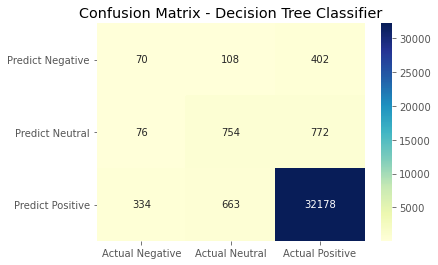

In [42]:
from sklearn.metrics import precision_score,recall_score,confusion_matrix,f1_score
cm = confusion_matrix(y_test, y_pred_test)
print('\n')
print("Confusion Matrix - Decision Tree Classifier")
print(cm)
print('\n')
# compute metrics on validation set
print("Evaluation Metrics - Decision Tree Classifier")
accuracy = round(accuracy_score(y_test,dt.predict(X_test)),4)
conf_matrix = confusion_matrix(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test,average='micro')
recall = recall_score(y_test, y_pred_test,average='micro')
f1_score = f1_score(y_test, y_pred_test,average='micro')
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1_score:.3f}")
ax = plt.axes()
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Negative', 'Actual Neutral', 'Actual Positive'], 
                        index=['Predict Negative', 'Predict Neutral', 'Predict Positive'])
ax.set_title('Confusion Matrix - Decision Tree Classifier')
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()



Confusion Matrix- Decision Tree Classifier


[[   70   108   402]
 [   76   754   772]
 [  334   663 32178]]




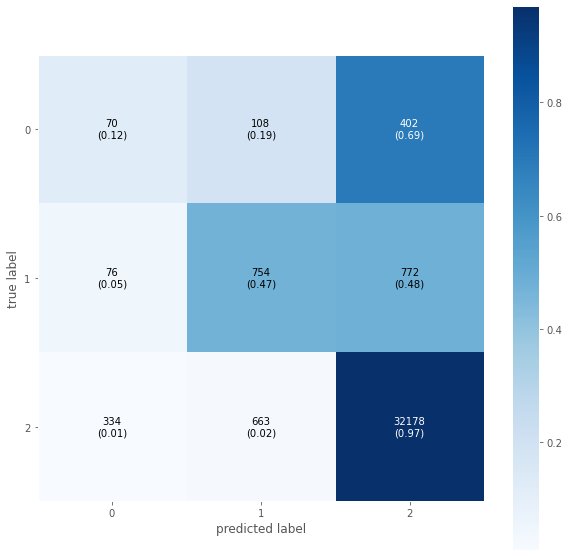

In [43]:
print('\n')
print("Confusion Matrix- Decision Tree Classifier")
print('\n')
CR=confusion_matrix(y_test, y_pred_test)
print(CR)
print('\n')
fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

### Naive Bayes Classifier

> Naive Bayes can be extended to real-valued attributes, most commonly by assuming a **Gaussian distribution**. This extension of naive Bayes is called **Gaussian Naive Bayes**. Other functions can be used to estimate the distribution of the data, but the Gaussian (or Normal distribution) is the easiest to work with because we only need to estimate the mean and the standard deviation from our training data.

In [44]:
# initialize model
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)

GaussianNB()

In [45]:
# predict and see the accuracy report
y_pred_gnb = model_gnb.predict(X_test)
print('\n')
print("Accuracy Score - GAUSSIAN NAIVE BAYES MODEL")
print('\n')
print("Training Accuracy score: "+str(round(accuracy_score(y_train,model_gnb.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,model_gnb.predict(X_test)),4)))



Accuracy Score - GAUSSIAN NAIVE BAYES MODEL


Training Accuracy score: 0.7225
Testing Accuracy score: 0.7289


In [46]:
print('\n')
print("Classification Report - GAUSSIAN NAIVE BAYES MODEL")
print('\n')
print(classification_report(y_test,y_pred_gnb))



Classification Report - GAUSSIAN NAIVE BAYES MODEL


              precision    recall  f1-score   support

           0       0.07      0.64      0.12       580
           1       0.21      0.73      0.33      1602
           2       0.99      0.73      0.84     33175

    accuracy                           0.73     35357
   macro avg       0.42      0.70      0.43     35357
weighted avg       0.94      0.73      0.81     35357



### Evaluation Metrics



Confusion Matrix - GAUSSIAN NAIVE BAYES MODEL
[[  374   152    54]
 [  307  1172   123]
 [ 4752  4198 24225]]


Evaluation Metrics - GAUSSIAN NAIVE BAYES MODEL
Accuracy: 72.89%
Precision: 0.729
Recall: 0.729
F1 Score: 0.729


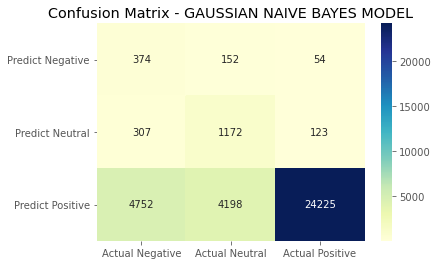

In [47]:
from sklearn.metrics import precision_score,recall_score,confusion_matrix,f1_score
cm = confusion_matrix(y_test, y_pred_gnb)
print('\n')
print("Confusion Matrix - GAUSSIAN NAIVE BAYES MODEL")
print(cm)
print('\n')
# compute metrics on validation set
print("Evaluation Metrics - GAUSSIAN NAIVE BAYES MODEL")
accuracy = round(accuracy_score(y_test,y_pred_gnb),4)
conf_matrix = confusion_matrix(y_test, y_pred_gnb)
precision = precision_score(y_test, y_pred_gnb,average='micro')
recall = recall_score(y_test, y_pred_gnb,average='micro')
f1_score = f1_score(y_test, y_pred_gnb,average='micro')
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1_score:.3f}")
ax = plt.axes()
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Negative', 'Actual Neutral', 'Actual Positive'], 
                        index=['Predict Negative', 'Predict Neutral', 'Predict Positive'])
ax.set_title('Confusion Matrix - GAUSSIAN NAIVE BAYES MODEL')
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()



Confusion Matrix- GAUSSIAN NAIVE BAYES MODEL


[[  374   152    54]
 [  307  1172   123]
 [ 4752  4198 24225]]




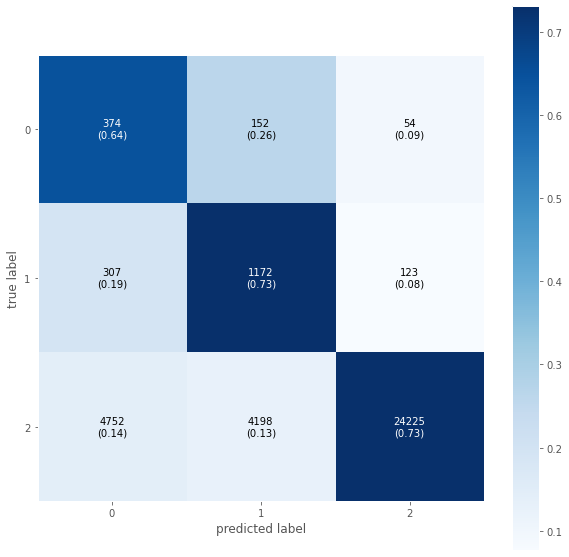

In [48]:
print('\n')
print("Confusion Matrix- GAUSSIAN NAIVE BAYES MODEL")
print('\n')
CR=confusion_matrix(y_test, y_pred_gnb)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

> Now we can see the model prediction are quite bad. We will try the same model, but using **SMOTE**.

We will Fix the class Imbalance and apply some sampling techniques.

### SMOTE 
> A problem with imbalanced classification is that **there are too few examples of the minority class for a model to effectively learn the decision boundary**. One way **to solve this problem is to oversample the examples in the minority class**. This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model.

> **Perhaps the most widely used approach to synthesizing new examples is called the Synthetic Minority Oversampling TEchnique, or SMOTE**. It works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line. Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.

> We will use this method below.

In [49]:
# set and apply SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE('minority')
X_sm, y_sm = oversample.fit_resample(X_train, y_train)
print(X_sm.shape, y_sm.shape)

(271867, 100) (271867,)


In [50]:
# initialize model with oversampled data

model_gnb.fit(X_sm, y_sm)

GaussianNB()

In [51]:
# predict and see the classification report with oversampled data

y_pred_gnb_sm = model_gnb.predict(X_test)
print('\n')
print("Classification Report - GAUSSIAN NAIVE BAYES MODEL - After SMOTE")
print('\n')
print(classification_report(y_test,y_pred_gnb_sm))



Classification Report - GAUSSIAN NAIVE BAYES MODEL - After SMOTE


              precision    recall  f1-score   support

           0       0.07      0.62      0.12       580
           1       0.19      0.63      0.29      1602
           2       0.99      0.74      0.84     33175

    accuracy                           0.73     35357
   macro avg       0.42      0.66      0.42     35357
weighted avg       0.94      0.73      0.81     35357



### Evaluation Metrics



Confusion Matrix - GAUSSIAN NAIVE BAYES MODEL - After SMOTE
[[  357   150    73]
 [  450  1014   138]
 [ 4583  4201 24391]]


Evaluation Metrics - GAUSSIAN NAIVE BAYES MODEL - After SMOTE
Accuracy: 72.86%
Precision: 0.729
Recall: 0.729
F1 Score: 0.729


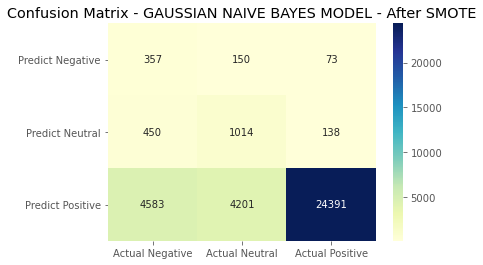

In [52]:
from sklearn.metrics import precision_score,recall_score,confusion_matrix,f1_score
cm = confusion_matrix(y_test, y_pred_gnb_sm)
print('\n')
print("Confusion Matrix - GAUSSIAN NAIVE BAYES MODEL - After SMOTE")
print(cm)
print('\n')
# compute metrics on validation set
print("Evaluation Metrics - GAUSSIAN NAIVE BAYES MODEL - After SMOTE")
accuracy = round(accuracy_score(y_test,y_pred_gnb_sm),4)
conf_matrix = confusion_matrix(y_test, y_pred_gnb_sm)
precision = precision_score(y_test, y_pred_gnb_sm,average='micro')
recall = recall_score(y_test, y_pred_gnb_sm,average='micro')
f1_score = f1_score(y_test, y_pred_gnb_sm,average='micro')
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1_score:.3f}")
ax = plt.axes()
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Negative', 'Actual Neutral', 'Actual Positive'], 
                        index=['Predict Negative', 'Predict Neutral', 'Predict Positive'])
ax.set_title('Confusion Matrix - GAUSSIAN NAIVE BAYES MODEL - After SMOTE')
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()



Confusion Matrix- GAUSSIAN NAIVE BAYES MODEL - After SMOTE


[[  357   150    73]
 [  450  1014   138]
 [ 4583  4201 24391]]




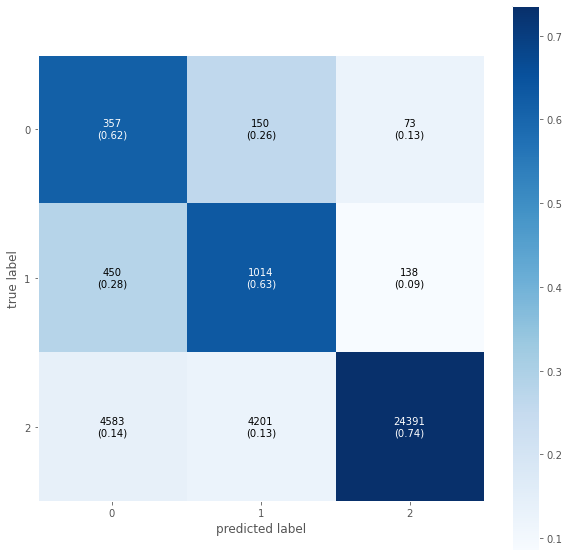

In [53]:
print('\n')
print("Confusion Matrix- GAUSSIAN NAIVE BAYES MODEL - After SMOTE")
print('\n')
CR=confusion_matrix(y_test, y_pred_gnb_sm)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

> Although there are some visible improvement, we can say that this model prediction is still not very high.

### Logistic Regression


In [54]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=101).fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
print('\n')
print("Accuracy Score - Logistic Regression")
print('\n')
print("Training Accuracy score: "+str(round(accuracy_score(y_train,lr.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,lr.predict(X_test)),4)))



Accuracy Score - Logistic Regression


Training Accuracy score: 0.9482
Testing Accuracy score: 0.9488


In [55]:
print('\n')
print("Classification Report - Logistic Regression")
print('\n')
print(classification_report(y_test, y_pred_test, target_names=['positive', 'neutral', 'negative']))



Classification Report - Logistic Regression


              precision    recall  f1-score   support

    positive       0.43      0.04      0.07       580
     neutral       0.66      0.41      0.50      1602
    negative       0.96      0.99      0.97     33175

    accuracy                           0.95     35357
   macro avg       0.68      0.48      0.52     35357
weighted avg       0.94      0.95      0.94     35357



### Evaluation Metrics



Confusion Matrix - Logistic Regression
[[   23    56   501]
 [   12   654   936]
 [   18   286 32871]]


Evaluation Metrics - Logistic Regression
Accuracy: 94.88%
Precision: 0.949
Recall: 0.949
F1 Score: 0.949


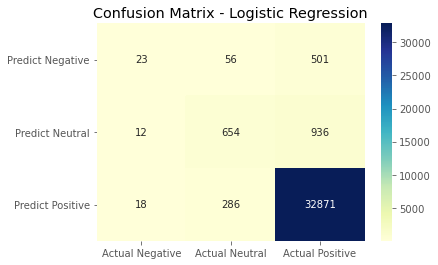

In [56]:
from sklearn.metrics import precision_score,recall_score,confusion_matrix,f1_score
cm = confusion_matrix(y_test, y_pred_test)
print('\n')
print("Confusion Matrix - Logistic Regression")
print(cm)
print('\n')
# compute metrics on validation set
print("Evaluation Metrics - Logistic Regression")
accuracy = round(accuracy_score(y_test,y_pred_test),4)
conf_matrix = confusion_matrix(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test,average='micro')
recall = recall_score(y_test, y_pred_test,average='micro')
f1_score = f1_score(y_test, y_pred_test,average='micro')
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1_score:.3f}")
ax = plt.axes()
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Negative', 'Actual Neutral', 'Actual Positive'], 
                        index=['Predict Negative', 'Predict Neutral', 'Predict Positive'])
ax.set_title('Confusion Matrix - Logistic Regression')
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()



Confusion Matrix- Logistic Regression


[[   23    56   501]
 [   12   654   936]
 [   18   286 32871]]




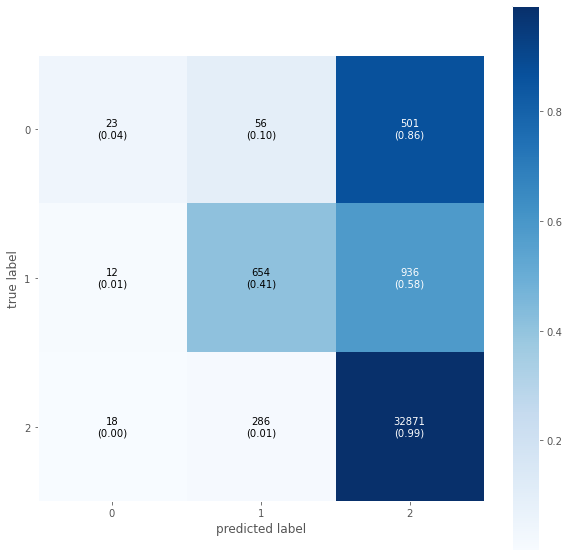

In [57]:
print('\n')
print("Confusion Matrix- Logistic Regression")
print('\n')
CR=confusion_matrix(y_test, y_pred_test)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

### Support Vector Machine (SVM)

> **Stochastic Gradient Descent (SGD)** is an iterative method for optimizing an objective function with suitable smoothness properties (e.g. differentiable or subdifferentiable). It is a **Linear classifiers (SVM, logistic regression, a.o.) with SGD training**. This estimator **implements regularized linear models with stochastic gradient descent (SGD) learning** : the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule / learning rate. SGD allows minibatch (online/out-of-core) learning, see the partial_fit method. For best results using the default learning rate schedule, the data should have zero mean and unit variance.

> This implementation works with data represented as dense or sparse arrays of floating point values for the features. The model it fits can be controlled with the loss parameter. **By default, it fits a Linear Support Vector Machine (SVM)**. And Linear SVM is **widely regarded as one of the best text classification algorithms**.

In [58]:
# initialize model 

model_sgd = SGDClassifier(random_state=42, class_weight='balanced')
model_sgd.fit(X_train, y_train)

SGDClassifier(class_weight='balanced', random_state=42)

In [59]:
# predict and see the classification report

y_pred_sgd = model_sgd.predict(X_test)
print('\n')
print("Confusion Matrix - SVM")
print('\n')
print(confusion_matrix(y_test,y_pred_sgd))
print('\n')
print("Classification Report - SVM")
print('\n')
print(classification_report(y_test,y_pred_sgd))



Confusion Matrix - SVM


[[  218   128   234]
 [  196  1096   310]
 [  463  1006 31706]]


Classification Report - SVM


              precision    recall  f1-score   support

           0       0.25      0.38      0.30       580
           1       0.49      0.68      0.57      1602
           2       0.98      0.96      0.97     33175

    accuracy                           0.93     35357
   macro avg       0.57      0.67      0.61     35357
weighted avg       0.95      0.93      0.94     35357



> We can see that using **weighted class** this model **proved to be far better than naive bayes model** in terms of **accuracy and f1 score**. But I'll try to implement SMOTE to see whether it can be improved.

In [60]:
# initialize model with oversampled data

model_sgd.fit(X_sm, y_sm)

SGDClassifier(class_weight='balanced', random_state=42)

In [61]:
# predict and see the classification report with oversampled data

y_pred_sgd_sm = model_sgd.predict(X_test)
print('\n')
print("Confusion Matrix - SVM")
print('\n')
print(confusion_matrix(y_test,y_pred_sgd_sm))
print('\n')
print("Classification Report - SVM")
print('\n')
print(classification_report(y_test,y_pred_sgd_sm))



Confusion Matrix - SVM


[[  454    29    97]
 [  838   606   158]
 [ 3246   640 29289]]


Classification Report - SVM


              precision    recall  f1-score   support

           0       0.10      0.78      0.18       580
           1       0.48      0.38      0.42      1602
           2       0.99      0.88      0.93     33175

    accuracy                           0.86     35357
   macro avg       0.52      0.68      0.51     35357
weighted avg       0.95      0.86      0.90     35357



### Evaluation Metrics



Confusion Matrix - STOCHASTIC GRADIENT DESCENT
[[  454    29    97]
 [  838   606   158]
 [ 3246   640 29289]]


Evaluation Metrics - STOCHASTIC GRADIENT DESCENT
Accuracy: 85.84%
Precision: 0.949
Recall: 0.858
F1 Score: 0.858


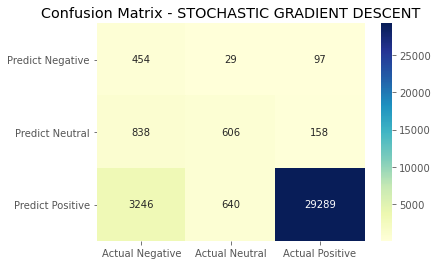

In [62]:
from sklearn.metrics import precision_score,recall_score,confusion_matrix,f1_score
cm = confusion_matrix(y_test, y_pred_sgd_sm)
print('\n')
print("Confusion Matrix - STOCHASTIC GRADIENT DESCENT")
print(cm)
print('\n')
# compute metrics on validation set
print("Evaluation Metrics - STOCHASTIC GRADIENT DESCENT")
accuracy = round(accuracy_score(y_test,y_pred_sgd_sm),4)
conf_matrix = confusion_matrix(y_test, y_pred_sgd_sm)
precision = precision_score(y_test, y_pred_test,average='micro')
recall = recall_score(y_test, y_pred_sgd_sm,average='micro')
f1_score = f1_score(y_test, y_pred_sgd_sm,average='micro')
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1_score:.3f}")
ax = plt.axes()
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Negative', 'Actual Neutral', 'Actual Positive'], 
                        index=['Predict Negative', 'Predict Neutral', 'Predict Positive'])
ax.set_title('Confusion Matrix - STOCHASTIC GRADIENT DESCENT')
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()



Confusion Matrix- STOCHASTIC GRADIENT DESCENT


[[  454    29    97]
 [  838   606   158]
 [ 3246   640 29289]]




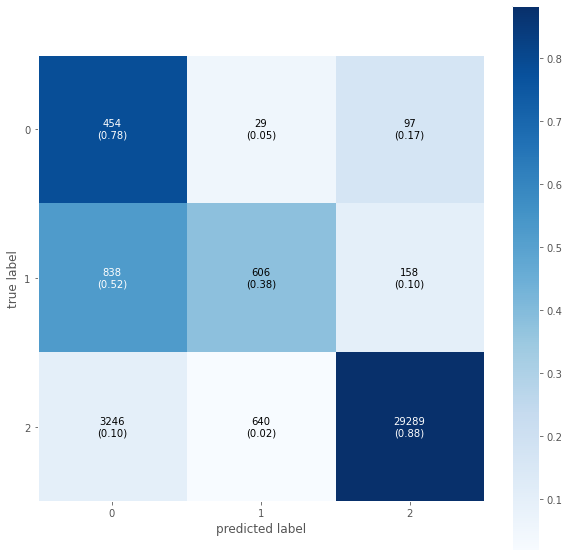

In [63]:
print('\n')
print("Confusion Matrix- STOCHASTIC GRADIENT DESCENT")
print('\n')
CR=confusion_matrix(y_test, y_pred_sgd_sm)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

### Ensembling

In [64]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Decision Tree', dt),
               ('Logistic Regression', lr),
                ('Naive Bayes', model_gnb)
              ]
vc = VotingClassifier(estimators=classifiers)
# Fit 'vc' to the traing set and predict test set labels
vc.fit(X_train, y_train)

print("Training Accuracy score: "+str(round(accuracy_score(y_train,vc.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,vc.predict(X_test)),4)))

Training Accuracy score: 0.9728
Testing Accuracy score: 0.9392


### Conclusion

We have build the following models -  Decision Tree, SVM, Naive Bayes and Logistic Regression and implemented them for the given dataset as part of the experiment along with a comparative analysis of various metrics and made the following observations.

- Naïve Bayes accuracy is lower and is susceptible to noise if present in the dataset because when we reduced the number of features by considering only the most frequent words the accuracy and AUC score increased significantly.

- Logistic Regression, Decision Trees and SVM performed almost same for the given dataset even with the initial number of features.

### Hyperparameter Tuning

> We will start the parameter tuning process to get a more accurate model

In [65]:
# function to check data summary

def summary(df):
    
    columns = df.columns.to_list()
    
    dtypes = []
    unique_counts = []
    missing_counts = []
    missing_percentages = []
    total_counts = [df.shape[0]] * len(columns)

    for col in columns:
        dtype = str(df[col].dtype)
        dtypes.append(dtype)
        unique_count = df[col].nunique()
        unique_counts.append(unique_count)
        missing_count = df[col].isnull().sum()
        missing_counts.append(missing_count)
        missing_percentage = round((missing_count/df.shape[0]) * 100, 2)
        missing_percentages.append(missing_percentage)

    df_summary = pd.DataFrame({
        "column": columns,
        "dtypes": dtypes,
        "unique_count": unique_counts,
        "missing_values": missing_counts,
        "missing_percentage": missing_percentages,
        "total_count": total_counts,
    })

    return df_summary.sort_values(by="missing_percentage", ascending=False).reset_index(drop=True)

In [66]:
# SGD Classifier param
loss = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'] 
penalty = ['l1', 'l2', 'elasticnet'] 
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] 
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive'] 
eta0 = [1, 10, 100] 
sgd_param = {'loss' : loss, 'penalty': penalty, 'alpha' : alpha, 'learning_rate' : learning_rate, 'eta0' : eta0}

In [67]:
# function to automate tuning process

def cvparam(est, xtr, ytr):
    scv = RandomizedSearchCV(estimator = est, param_distributions = sgd_param, cv=10, scoring = 'f1_macro')
    result = scv.fit(xtr, ytr)
    return result

In [68]:
# label the target
df['sentiment'] = LabelEncoder().fit_transform(df['sentiment'])

In [69]:
# set the dependent

vectorizer = TfidfVectorizer(max_features = 100)
tf_idf = vectorizer.fit_transform(df['comments_cleaned']).toarray()
print(tf_idf)

[[0.         0.         0.16115434 ... 0.         0.         0.        ]
 [0.08202601 0.08346334 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.13219025 0.16899232 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.33145443 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [70]:
# split data

X_train, X_test, y_train, y_test = train_test_split(tf_idf, df['sentiment'], test_size=0.2, random_state=101)

In [71]:
# initialize model

model_sgd = SGDClassifier(random_state = 42, class_weight='balanced')
model_sgd.fit(X_train, y_train)

SGDClassifier(class_weight='balanced', random_state=42)

In [72]:
# search parameter

for i in range(1,4):
    cv_rfc = cvparam(model_sgd, X_train, y_train)
    print('Score : ', i, cv_rfc.best_score_)
    print('Parameter : ', i, cv_rfc.best_params_)

Score :  1 0.605760025634863
Parameter :  1 {'penalty': 'l2', 'loss': 'squared_hinge', 'learning_rate': 'adaptive', 'eta0': 100, 'alpha': 0.0001}
Score :  2 0.609044430877466
Parameter :  2 {'penalty': 'l1', 'loss': 'log', 'learning_rate': 'invscaling', 'eta0': 1, 'alpha': 0.0001}
Score :  3 0.5698750658959411
Parameter :  3 {'penalty': 'elasticnet', 'loss': 'hinge', 'learning_rate': 'invscaling', 'eta0': 100, 'alpha': 0.001}


## Model Testing - SVM

In [73]:
# initialize model

first_model  = SGDClassifier(penalty='l1', loss='modified_huber', learning_rate='adaptive', eta0=100, alpha=0.0001, random_state=42, class_weight='balanced')
second_model = SGDClassifier(penalty='elasticnet', loss='modified_huber', learning_rate='optimal', eta0=100, alpha=100, random_state=42, class_weight='balanced')
third_model  = SGDClassifier(penalty='l2', loss='perceptron', learning_rate='optimal', eta0=10, alpha=0.1, random_state=42, class_weight='balanced')

In [74]:
# function to automate model scoring 

def score(model, X_train, X_test, y_train, y_test):
    model  = model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    return print(classification_report(y_test,y_pred))

In [75]:
models = [first_model, second_model, third_model]
for i in range(3):
    print('Model', i)
    score(models[i], X_train, X_test, y_train, y_test)

Model 0
              precision    recall  f1-score   support

           0       0.22      0.45      0.30       580
           1       0.47      0.72      0.57      1602
           2       0.99      0.94      0.96     33175

    accuracy                           0.93     35357
   macro avg       0.56      0.70      0.61     35357
weighted avg       0.95      0.93      0.94     35357

Model 1
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       580
           1       0.00      0.00      0.00      1602
           2       0.94      1.00      0.97     33175

    accuracy                           0.94     35357
   macro avg       0.31      0.33      0.32     35357
weighted avg       0.88      0.94      0.91     35357

Model 2
              precision    recall  f1-score   support

           0       0.11      0.52      0.18       580
           1       0.49      0.47      0.48      1602
           2       0.98      0.92      0.95     331

> Looking at the results above, We will go with the **first parameter** since the result in general is better than the rest of it. 

## Conclusion

- We have successfully modelled a high performing **SVM Model** 

- We will now try building a more accurate **Neural Network Model**

### Deep Learning Model 

In [76]:
df.head()

listing_id       id       date reviewer_id reviewer_name  \
0      27934  1094339 2012-04-07     1368195       Michael   
1     172332  3367236 2013-01-18     4406839        Sophie   
2      27934  1241042 2012-05-07     2007324         Scott   
3     172332  4227455 2013-04-20     5857160         Erick   
4     172332  7747052 2013-10-01     7431791         Peter   

                                            comments lang  \
0  We stayed in the apartment for a week and we e...   en   
1  \r<br/>We, my husband, my daughter (15 months)...   en   
2  My girlfriend and I recently stayed in Nuttee'...   en   
3  I honestly can't thank Raewyn enough. Myself a...   en   
4  This was my first time in Bangkok and I could ...   en   

                                    comments_cleaned  \
0  stayed apartment week enjoyed much nuttee nice...   
1  br husband daughter months stayed one month pe...   
2  girlfriend recently stayed nuttee condo month ...   
3  honestly thank raewyn enough fiance looking qu...   
4  first time bangkok could picked better place s...   

                                  comments_tokenized  compound_score  \
0  apartment week much nuttee nice host perfect a...          0.8720   
1  daughter month month peace host friendly know ...          0.9794   
2  girlfriend nuttee month beautiful great view g...          0.9885   
3  enough fiance quiet place hectic life property...          0.9871   
4  first time well place well people complexity c...          0.9552   

   sentiment                                 topics  label label_name  \
0          2  comfortable host room clean apartment      2   positive   
1          2  comfortable host room clean apartment      2   positive   
2          2         value stay host location great      2   positive   
3          2      close perfect clean amazing place      2   positive   
4          2      close perfect clean amazing place      2   positive   

   sentiment_type_negative  sentiment_type_neutral  sentiment_type_positive  
0                        0                       0                        1  
1                        0                       0                        1  
2                        0                       0                        1  
3                        0                       0                        1  
4                        0                       0                        1

## Modeling

Before we build our deep learning model, we are going to go through a few steps. The first one is to Split the data frame into Train and Test. Second, we will vectorize and embed the reviews. In order to prevent overfitting we will balance the train set and also reduce the amount of features of it. Then we are going to create 3 functions of metrics that will be used into our model.

In [77]:
y =  df[df.columns[14:]].values
X = []
sentences = list(df["comments_cleaned"])
for sen in sentences:
    X.append(sen)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Embedding

We need to convert text inputs into embedded vectors such that we can apply machine learning.
In word embeddings, every word is represented as an n-dimensional dense vector. The words that are similar will have similar vectors.

In order to embed our text, first we need to transform our reviews into vector representations. Here we will use Tokenizer module from keras.preprocessing.text to vectorize the text corpus and we will need the module pad_sequences from keras.preprocessing.sequence to ensure that all sequences in the list of words have the same length.

After vectorising the text and ensuring that all sequences have the same length we will use the GloVe, Global Vectors For Word Representation to convert text inputs to their numeric counterparts. See more about GloVe

In [78]:
# Defining the num of words
tokenizer = Tokenizer(num_words=5000)
# Fighting in the X df
tokenizer.fit_on_texts(X)

# Tokenizing Train and test

X_prep = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

# Setting the max length of features

maxlen = 200

# Ensuring the all sequences have the same length
X_train = pad_sequences(X_prep, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

We will be using numpy arrays and GloVe word embeddings to convert text inputs to their numeric counterparts.

In [79]:
embeddings_dictionary = dict()

glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

## Balancing

As seen before, the data set is highly unbalanced, to be more precise in the results we will balance the dataset using the imblearn Random OverSampling technique.

In [80]:
print('Negative',pd.DataFrame(y_train).sum()[0])
print('Neutral',pd.DataFrame(y_train).sum()[1])
print('Positve',pd.DataFrame(y_train).sum()[2])

Negative 2216
Neutral 6519
Positve 132690


In [81]:
over = RandomOverSampler()
X_ov, y_ov = over.fit_resample(X_train, y_train)
print('Negative',pd.DataFrame(y_ov).sum()[0])
print('Neutral',pd.DataFrame(y_ov).sum()[1])
print('Positve',pd.DataFrame(y_ov).sum()[2])

Negative 132690
Neutral 132690
Positve 132690


## Featuring Selection

In order to prevent overfitting we are going to reduce the features of the data frame. To do that we are going to use one of the simplest and most common ways to select relevant features for classification which is to calculate the F-Score for each feature.

The F-Score is calculated using the variance between the features and the variance within each feature. A small F-score usually means that the feature is less important than a feature with a high F-score. We will calculate the F-Score of the features per sentiment using sklearn modules SelectKBest and f_classif to return the ANOVA F-value.

In [82]:
selected_features = [] 
for label in range(0,3):
    selector = SelectKBest(f_classif, k='all')
    selector.fit(X_ov, pd.DataFrame(y_ov)[label])
    selected_features.append(list(selector.scores_))

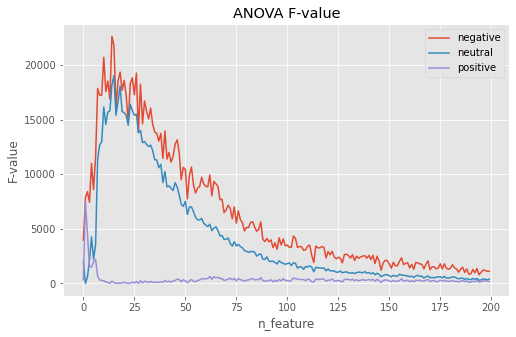

In [83]:
plt.figure(figsize=(8, 5))
plt.plot(selected_features[0])
plt.plot(selected_features[1])
plt.plot(selected_features[2])

plt.title('ANOVA F-value')
plt.ylabel('F-value')
plt.xlabel('n_feature')
plt.legend(['negative','neutral','positive'], loc='upper right')


plt.show()

As noticed, usually the reviews have the highest F-Scores till the feature around 10. After that the F_store is visually decreasing. So, we will arbitrarily drop the features after the 20.

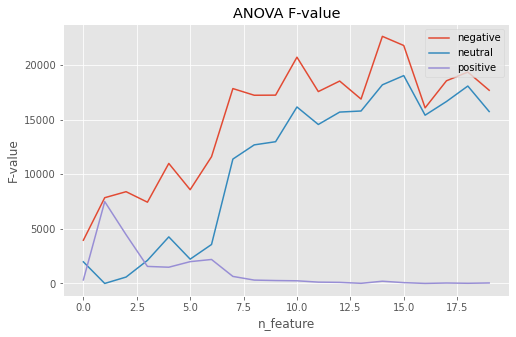

In [84]:
plt.figure(figsize=(8, 5))
plt.plot(pd.DataFrame(selected_features).T[:20][0])
plt.plot(pd.DataFrame(selected_features).T[:20][1])
plt.plot(pd.DataFrame(selected_features).T[:20][2])

plt.title('ANOVA F-value')
plt.ylabel('F-value')
plt.xlabel('n_feature')
plt.legend(['negative','neutral','positive'], loc='upper right')

plt.show()

In [85]:
X_ov=X_ov[:,:20]

## Evaluation Metrics


To go beyond just the Accuracy metric we will calculate also the Recall, Precision and F1 Score manually.

Reviewing accuracy, recall, precision and f1 score. We are using the Exsilio Solutions explanations.

- TP - True Positive
- TN - True Negative
- FP - False Positive
- FN - False Negative

<b>Accuracy</b> - "Is a great measure but only when you have symmetric datasets where values of false positive and false negatives are almost same"

- Accuracy = TP+TN/TP+FP+FN+TN

<b>Precision</b> - "Precision is the ratio of correctly predicted positive observations to the total predicted positive observations"

- Precision = TP/TP+FP

<b>Recall</b> - "Recall is the ratio of correctly predicted positive observations to the all observations in actual class"

- Recall = TP/TP+FN

<b>F1 score</b> - "F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution."

- F1 Score = 2(Recall Precision) / (Recall + Precision)

Those metrics have been removed from Keras core. See the release notes.

So to do that we will use the three following functions that will be called by the Neural Networks.

In [86]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

In [87]:
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [88]:
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

## Neural Networks


To create a model to predict the text sentiment, we will have one input layer shape 20, the number of features. One Embedding Layer that takes the vocab size and the embedding matrix created before. One Long Short-Term Memory (LSTM) layer with 128 neurons and finely the output layer with 3 neurons since we have 3 labels in the output, Positive, Neutral and Negative.

We are going to use keras model module and keras.layers, Dense, LSTM and Embedding.

For the metrics we will set Accuracy, F1, Precision and Recall that we defined above.

In [89]:
df.head()

listing_id       id       date reviewer_id reviewer_name  \
0      27934  1094339 2012-04-07     1368195       Michael   
1     172332  3367236 2013-01-18     4406839        Sophie   
2      27934  1241042 2012-05-07     2007324         Scott   
3     172332  4227455 2013-04-20     5857160         Erick   
4     172332  7747052 2013-10-01     7431791         Peter   

                                            comments lang  \
0  We stayed in the apartment for a week and we e...   en   
1  \r<br/>We, my husband, my daughter (15 months)...   en   
2  My girlfriend and I recently stayed in Nuttee'...   en   
3  I honestly can't thank Raewyn enough. Myself a...   en   
4  This was my first time in Bangkok and I could ...   en   

                                    comments_cleaned  \
0  stayed apartment week enjoyed much nuttee nice...   
1  br husband daughter months stayed one month pe...   
2  girlfriend recently stayed nuttee condo month ...   
3  honestly thank raewyn enough fiance looking qu...   
4  first time bangkok could picked better place s...   

                                  comments_tokenized  compound_score  \
0  apartment week much nuttee nice host perfect a...          0.8720   
1  daughter month month peace host friendly know ...          0.9794   
2  girlfriend nuttee month beautiful great view g...          0.9885   
3  enough fiance quiet place hectic life property...          0.9871   
4  first time well place well people complexity c...          0.9552   

   sentiment                                 topics  label label_name  \
0          2  comfortable host room clean apartment      2   positive   
1          2  comfortable host room clean apartment      2   positive   
2          2         value stay host location great      2   positive   
3          2      close perfect clean amazing place      2   positive   
4          2      close perfect clean amazing place      2   positive   

   sentiment_type_negative  sentiment_type_neutral  sentiment_type_positive  
0                        0                       0                        1  
1                        0                       0                        1  
2                        0                       0                        1  
3                        0                       0                        1  
4                        0                       0                        1

In [90]:
deep_inputs = Input(shape=(20,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(3, activation='sigmoid')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc',f1_m,precision_m, recall_m])

### Printing the model summary:

In [91]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20)]              0         
                                                                 
 embedding (Embedding)       (None, 20, 100)           4262000   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 4,379,635
Trainable params: 117,635
Non-trainable params: 4,262,000
_________________________________________________________________
None


### To visualize, we will printing the architecture of our neural network with the plot_model from keras utils

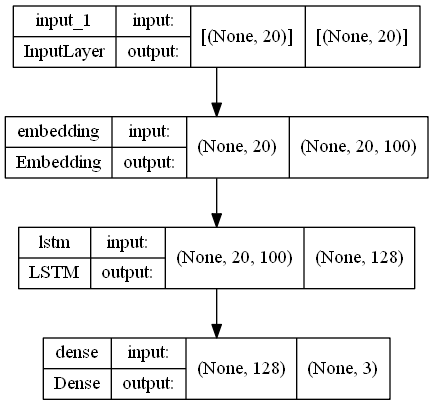

In [92]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [93]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer

x = df.comments_cleaned
y = df.label_name
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)


# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(x_train)
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)
vect_tunned


CountVectorizer(max_df=0.7, max_features=100, min_df=0.1, ngram_range=(1, 2),
                stop_words='english')

### Let's train our model with 0.7 of the random oversampling DF. Batch_size 32 and apochs 15. The other 0.3 of the DF will be used for the validation.

In [94]:
history = model.fit(X_ov, y_ov, batch_size=32, epochs=15, verbose=1, validation_split=0.3)


Epoch 1/15
8708/8708 [==============================] - 84s 9ms/step - loss: 0.1228 - acc: 0.9330 - f1_m: 0.9325 - precision_m: 0.9374 - recall_m: 0.9280 - val_loss: 0.6308 - val_acc: 0.6255 - val_f1_m: 0.6230 - val_precision_m: 0.6323 - val_recall_m: 0.6144
Epoch 2/15
8708/8708 [==============================] - 93s 11ms/step - loss: 0.0521 - acc: 0.9750 - f1_m: 0.9746 - precision_m: 0.9762 - recall_m: 0.9732 - val_loss: 0.4461 - val_acc: 0.7086 - val_f1_m: 0.7137 - val_precision_m: 0.7155 - val_recall_m: 0.7122
Epoch 3/15
8708/8708 [==============================] - 82s 9ms/step - loss: 0.0366 - acc: 0.9816 - f1_m: 0.9814 - precision_m: 0.9824 - recall_m: 0.9805 - val_loss: 0.3572 - val_acc: 0.7899 - val_f1_m: 0.7919 - val_precision_m: 0.7911 - val_recall_m: 0.7931
Epoch 4/15
8708/8708 [==============================] - 76s 9ms/step - loss: 0.0275 - acc: 0.9860 - f1_m: 0.9858 - precision_m: 0.9865 - recall_m: 0.9851 - val_loss: 0.2175 - val_acc: 0.8730 - val_f1_m: 0.8721 - val_precis

## Results

Now let's plot the results that our model got. First let's plot the history of the metrics that the model got during the 10 epochs in the train and in the validation data set. Then we are going to build a table to see the metrics achieved in the train and in the test data set and finely we will build a function that put our model in context getting a human comment, appling the text preprocessing and the model to plot the label predicted by our model.

## Plotting History


Now, we are going to use matplotlib again to plot the model History that recorded training and validation metrics for each epoch. The results obtained in history for Loss, Accuracy, Precision, Recall and F1 score for Training in blue and Validation in orange.

### Plotting the Loss

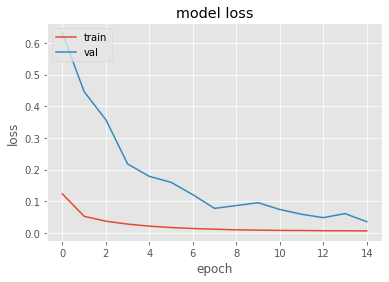

In [95]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')

plt.show()

### Plotting the Accuracy


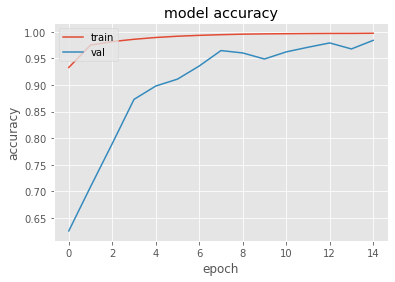

In [96]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

### Plotting the Precision

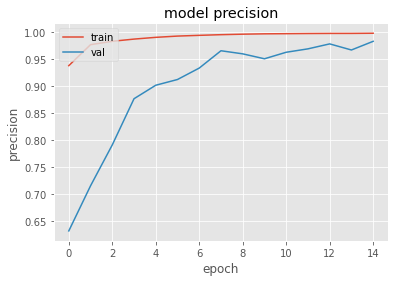

In [97]:
plt.plot(history.history['precision_m'])
plt.plot(history.history['val_precision_m'])

plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

### Plotting the Recall

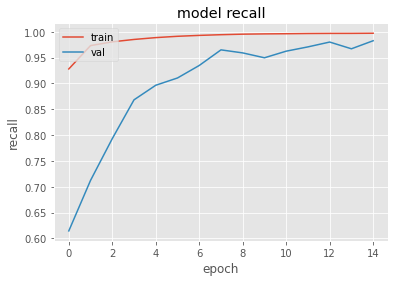

In [98]:
plt.plot(history.history['recall_m'])
plt.plot(history.history['val_recall_m'])

plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

### Plotting F1 Score

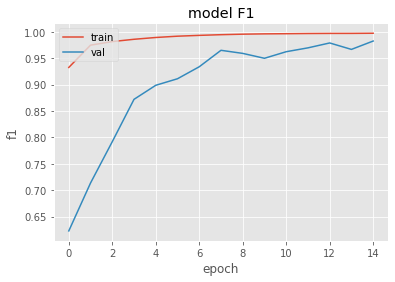

In [99]:
plt.plot(history.history['f1_m'])
plt.plot(history.history['val_f1_m'])

plt.title('model F1')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

## Test Evaluation

Now let's evaluate in the training and in testing dfs.

In [100]:
score_train = model.evaluate(X_ov[:,:20], y_ov, verbose=1)

12440/12440 [==============================] - 46s 4ms/step - loss: 0.0127 - acc: 0.9943 - f1_m: 0.9937 - precision_m: 0.9938 - recall_m: 0.9938


In [101]:
score = pd.DataFrame({'Loss':[score_train[0]],
             'Accuracy':[score_train[1]],
             'Precision':[score_train[3]],
             'Recall':[score_train[4]],
             'F1-Score':[score_train[2]]
                     },
             index=['Train Score'])

score

Loss  Accuracy  Precision    Recall  F1-Score
Train Score  0.012717  0.994267   0.993764  0.993778  0.993749

<b> Low Loss but high in the test, good Accuracy, Precision, Recall and F1-score for both data frames. </b>

For the final test we will build a function that puts everything that we learned into context. The following function will apply our pipeline for text preprocessing, classify a comment with our model and will return if the comment is Positive, Negative or Neutral.

We now test if the model is really accurate in real world comments.

### We create following functions for input data testing

In [102]:
def sentiment_analysis(text, pipeline, model):
    
    # Applying the pipeline
    if type(text) is not list:
        text = [text]
        text_prep = text_prep_pipeline.fit_transform(text)
        text_prep = tokenizer.texts_to_sequences(text_prep)
        matrix = pad_sequences(text_prep, padding='post', maxlen=20)
        # Predicting sentiment
        proba = model.predict(matrix)
    
    
    # Plotting the sentiment and its score
    fig, ax = plt.subplots(figsize=(5, 3))
    
    if proba.argmax() == 0 :
        text = 'Negative'
        class_proba = int(proba[0][0].round(2)*100)
        color = 'Crimson'
        
    elif proba.argmax() == 1 :
        text = 'Neutral'
        class_proba = int(proba[0][1].round(2)*100) 
        color = 'Lightgrey'
       
    elif proba.argmax() == 2 :
        text = 'Positive'
        class_proba = int(proba[0][2].round(2)*100) 
        color = 'DeepSkyBlue'
        
    ax.text(0.5, 0.5, text, fontsize=50, ha='center', color=color)
    ax.text(0.5, 0.20, str(class_proba) + '%', fontsize=14, ha='center')
    ax.axis('off')
    ax.set_title('Sentiment Analysis', fontsize=14)
    plt.show()

TAG_RE = re.compile(r'<[^>]+>')
def re_tags(text_list): #define remove tag funtion
    return [TAG_RE.sub('', str(word)).lower() for word in text_list]

def re_accented_char(text_list):
    return [unidecode.unidecode(word.encode().decode('utf-8')) for word in text_list]

def ex_contractions(text_list):
    result=[]
    for word in text_list:
        # replace contracting withoutsignal
        word = word.replace("wont","won't")
        word = word.replace("cant","can't")
        word = word.replace("its","it's")
        word = word.replace("youre","you're")
        word = word.replace("hes","he's")
        word = word.replace("shes","she's")
        word = word.replace("its","it's")
        word = word.replace("weare","we're")
        word = word.replace("theyre","they're")

        # specific
        word = re.sub(r"won\'t", "will not", str(word))
        word = re.sub(r"can\'t", "can not", str(word))

        # general
        word = re.sub(r"n\'t", " not", str(word))
        word = re.sub(r"\'re", " are", str(word))
        word = re.sub(r"\'s", " is", str(word))
        word = re.sub(r"\'d", " would", str(word))
        word = re.sub(r"\'ll", " will", str(word))
        word = re.sub(r"\'t", " not", str(word))
        word = re.sub(r"\'ve", " have", str(word))
        word = re.sub(r"\'m", " am", str(word))
        result.append(word)
    return result

def re_special_chars(text_list):
    return [re.sub("[^a-zA-Z0-9]"," ",word) for word in text_list]

def re_whitespaces(text_list): 
    result=[]
    for word in text_list:
        word=(re.sub(r'\d','dig',str(word))) #remove numbers 
        word = (re.sub(r'\s+',' ', str(word))) #remove duplicates white spacces
        result.append(word)
    return result

# Class for regular expressions application
class ApplyRegex(BaseEstimator, TransformerMixin):
    
    def __init__(self, regex_transformers):
        self.regex_transformers = regex_transformers
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # Applying all regex functions in the regex_transformers dictionary
        for regex_name, regex_function in self.regex_transformers.items():
            X = regex_function(X)
            
        return X
    
class StopWordsRemoval(BaseEstimator, TransformerMixin):
    
    def __init__(self, text_stopwords):
        self.text_stopwords = text_stopwords
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return [self.text_stopwords(comment) for comment in X]
    
class LemmatizeProcess(BaseEstimator, TransformerMixin):
    
    def __init__(self, Lemmatize):
        self.Lemmatizer = Lemmatize
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return [self.Lemmatizer(comment) for comment in X]    
    
def stopwords_text(text_list):
    stop = stopwords.words('english')
    sentence_without = []
    tokenizer=nltk.tokenize.WhitespaceTokenizer()
    for word in tokenizer.tokenize(text_list):
        if word not in stop:
            sentence_without.append(word)
            sentence_without.append(" ")
            
    return("".join(sentence_without))    

from nltk.stem import WordNetLemmatizer 
def lemmatize_text(text_list):
    wnl = WordNetLemmatizer()
    lemmatizer_sentence = []  
    tokenizer=nltk.tokenize.WhitespaceTokenizer()
    for word in tokenizer.tokenize(text_list):
        lemmatizer_sentence.append(wnl.lemmatize(word,'v'))
        lemmatizer_sentence.append(" ")
    
    return("".join(lemmatizer_sentence))

# Defining regex transformers to be applied
regex_transformers = {
    'remove_tags': re_tags,
    'remove_accents': re_accented_char,
    'decontracted': ex_contractions,
    're_sc': re_special_chars,
    'whitespaces': re_whitespaces
}

# Building a text prep pipeline
text_prep_pipeline = Pipeline([
    ('regex', ApplyRegex(regex_transformers)),
    ('stopwords', StopWordsRemoval(stopwords_text)),
    ('lemmatize', LemmatizeProcess(lemmatize_text)),
])    

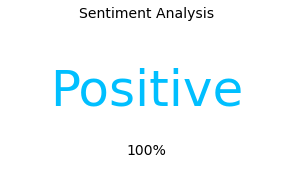

In [103]:
# Testing the Positive Sentiment
comment = "Very good experience !"
sentiment_analysis(comment, pipeline=text_prep_pipeline,  model=model)

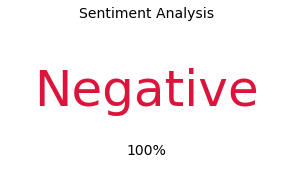

In [104]:
# Negative
comment = "The rooms are really dirty. Really disappointed"
sentiment_analysis(comment, pipeline=text_prep_pipeline, model=model)

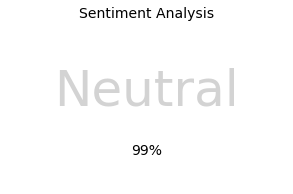

In [105]:
# Neutral
comment = "Service is normal. But i really want some improvements."
sentiment_analysis(text=comment, pipeline=text_prep_pipeline, model=model)

## Final Conclusion

<b> We have built a highly accurate Keras Deep Learn model for Multi-label Text Classification which performs much higher than the previous models build in this project </b>